<a href="https://colab.research.google.com/github/UsamaMed/data_science/blob/main/TensorFlow_Handwritten_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
print("TF version: ", tf.__version__)
import tensorflow_hub as hub
print("TF HUB version: ", hub.__version__)

## check for GPU avaliability
print("GPU" , "avaliable (YES)"  if tf.config.list_physical_devices("GPU") else "not aavaliable")


TF version:  2.14.0
TF HUB version:  0.15.0
GPU avaliable (YES)


In [2]:
(X_train, y_train ) , (X_test , y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(y_train)


60000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

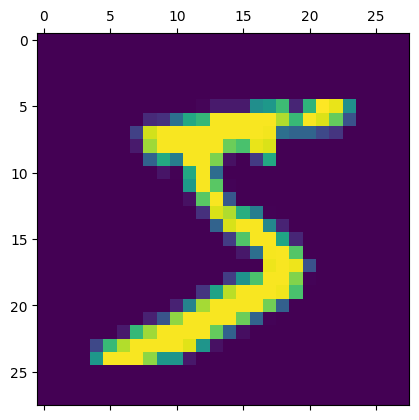

In [7]:
plt.matshow(X_train[0]);

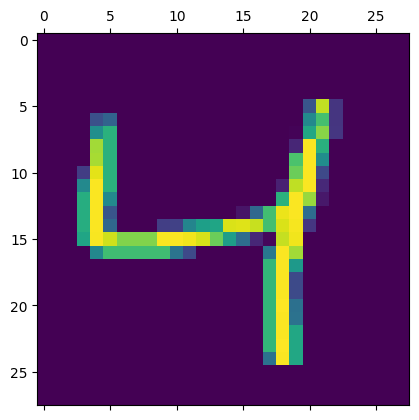

In [8]:
plt.matshow(X_train[2]);

In [9]:
y_train[2]

4

In [10]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [11]:
X_train = X_train / 255  ##scailing to imporve results
X_test = X_test / 255

In [12]:
X_train.shape

(60000, 28, 28)

In [13]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
### reshape

X_train_flattend = X_train.reshape(len(X_train),28*28)

X_test_flattend = X_test.reshape(len(X_test),28*28)

In [15]:
X_train_flattend.shape

(60000, 784)

In [16]:
X_test_flattend[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [18]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation="sigmoid")
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]
              )

model.fit(X_train_flattend, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4705 - accuracy: 0.8774
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3039 - accuracy: 0.9147
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2835 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2730 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2671 - accuracy: 0.9254


In [19]:
model.evaluate(X_test_flattend, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2707 - accuracy: 0.9242


[0.27067703008651733, 0.9241999983787537]

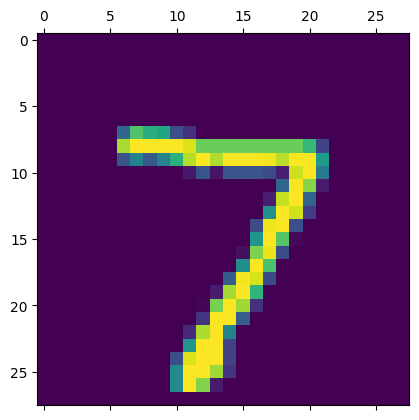

In [20]:
plt.matshow(X_test[0])

In [22]:
y_predicted = model.predict(X_test_flattend)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([2.9867912e-02, 4.2156728e-07, 3.3434823e-02, 9.5720088e-01,
       2.1379394e-03, 7.4282341e-02, 1.7773589e-06, 9.9980450e-01,
       9.7764559e-02, 7.2559792e-01], dtype=float32)

In [25]:
y_predicted_label = [np.argmax(i) for i in y_predicted]
y_predicted_label[:5]

[7, 2, 1, 0, 4]

In [23]:
np.argmax(y_predicted[0])

7

In [28]:
cm = tf.math.confusion_matrix(labels=y_test, predictions= y_predicted_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    1,    2,    0,    4,    3,    2,    1,    1],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   9,   11,  912,   23,    7,    3,   12,   10,   40,    5],
       [   4,    0,   16,  922,    1,   22,    2,   10,   23,   10],
       [   2,    1,    4,    2,  910,    0,    9,    3,    8,   43],
       [  12,    3,    3,   35,   11,  763,   12,   10,   34,    9],
       [  15,    3,    7,    1,    7,   12,  907,    2,    4,    0],
       [   2,    9,   20,    7,    6,    0,    0,  939,    3,   42],
       [   8,   12,    6,   20,    9,   19,    8,    9,  868,   15],
       [  11,    7,    1,    9,   22,    5,    0,   10,    5,  939]],
      dtype=int32)>

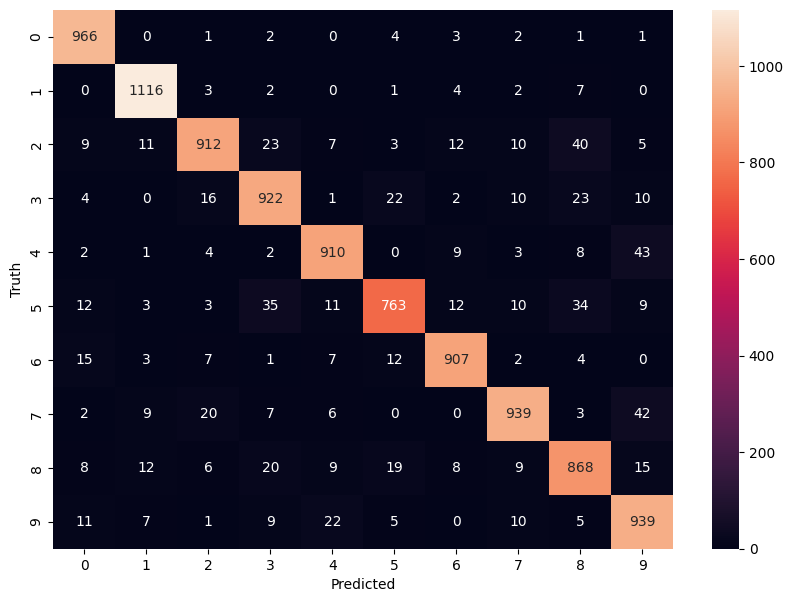

In [31]:
import seaborn as sn
plt.figure (figsize =(10,7))
sn.heatmap(cm, annot = True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth");


In [39]:
## hidden layer

model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation="relu"),
    keras.layers.Dense(10,  activation="sigmoid")
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]
              )

model.fit(X_train_flattend, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2775 - accuracy: 0.9213
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1260 - accuracy: 0.9630
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0882 - accuracy: 0.9727
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0677 - accuracy: 0.9796
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0543 - accuracy: 0.9833


In [34]:
model.evaluate(X_test_flattend, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1051 - accuracy: 0.9684


[0.10508209466934204, 0.9684000015258789]

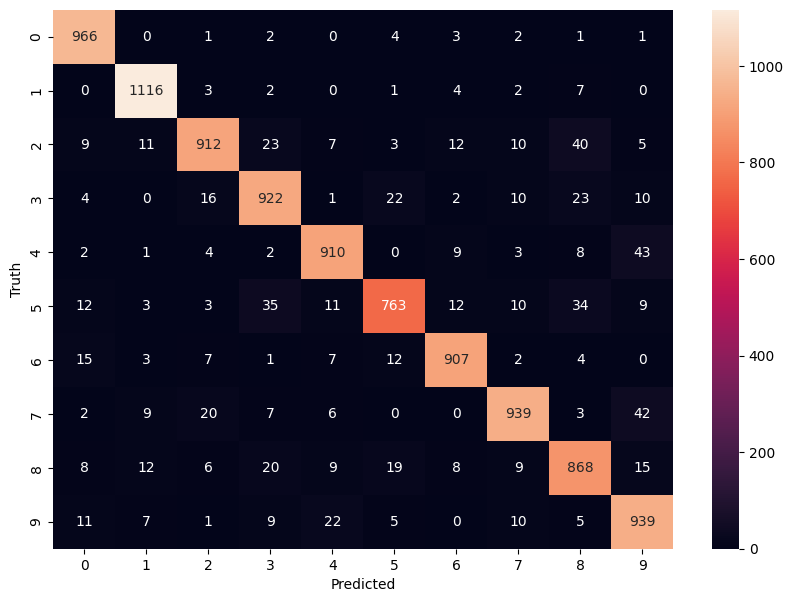

In [36]:
y_predicted_label = [np.argmax(i) for i in y_predicted]
y_predicted_label[:5]

cm = tf.math.confusion_matrix(labels=y_test, predictions= y_predicted_label)

import seaborn as sn
plt.figure (figsize =(10,7))
sn.heatmap(cm, annot = True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth");


In [38]:
## hidden layer

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,  activation="relu"),
    keras.layers.Dense(10,  activation="sigmoid")
])

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]
              )

model.fit(X_train,  y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2757 - accuracy: 0.9220
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1279 - accuracy: 0.9631
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0883 - accuracy: 0.9733
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0684 - accuracy: 0.9792
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0536 - accuracy: 0.9840
